 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored
import warnings

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV



Library configurations

In [2]:
pd.options.mode.copy_on_write = True
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

Importing Data

In [44]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/archive (10)/Clean_Dataset.csv')
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


Data Information


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int64  
 1   source_city       300153 non-null  int64  
 2   departure_time    300153 non-null  int64  
 3   stops             300153 non-null  int64  
 4   arrival_time      300153 non-null  int64  
 5   destination_city  300153 non-null  int64  
 6   flight_class      300153 non-null  int64  
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 22.9 MB


In [45]:
data.isna().sum()

,0
Unnamed: 0,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0


In [46]:
data.drop(columns='Unnamed: 0', inplace=True)

In [47]:
data.rename(columns={'class': 'flight_class'}, inplace=True)

visualizations

In [48]:
for index, value in enumerate(data.columns) :
    print(index, ":", value)

0 : airline
1 : flight
2 : source_city
3 : departure_time
4 : stops
5 : arrival_time
6 : destination_city
7 : flight_class
8 : duration
9 : days_left
10 : price


Airline

In [49]:
data.airline.value_counts()

,count
airline,
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


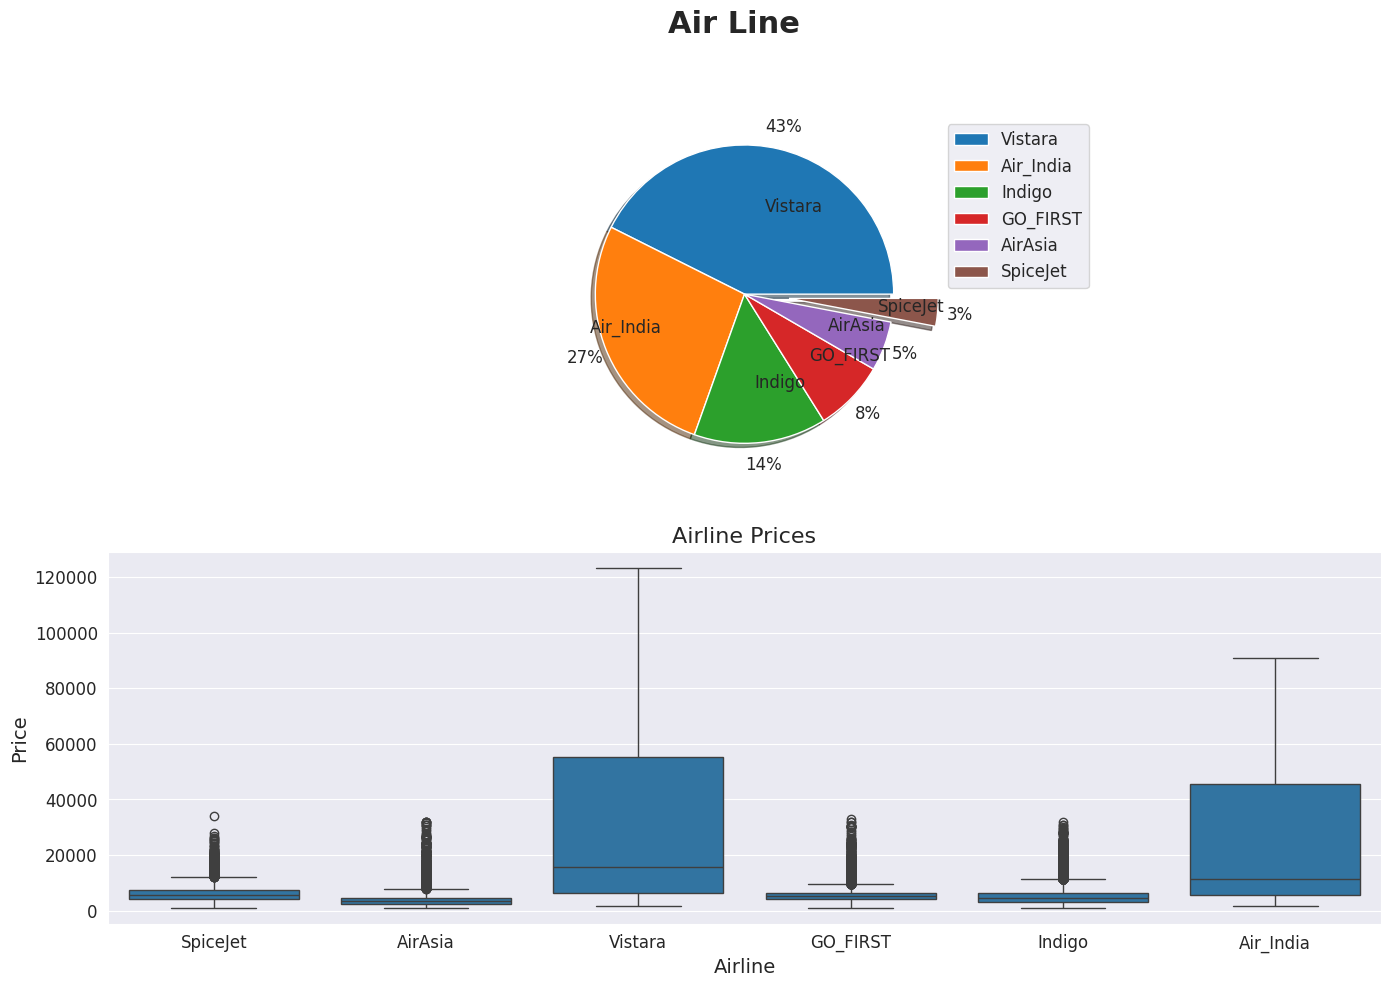

In [50]:
fig, ax = plt.subplots(2, 1, figsize=(14, 10))
fig.suptitle('Air Line', fontsize=22, fontweight='bold')
plt.tight_layout(pad=3.0)


labels = data.airline.value_counts().index.tolist()
explode = (0, 0, 0, 0, 0, 0.3)

ax[0].pie(
    data.airline.value_counts(), autopct='%.f%%', labels=labels, shadow=True,
    pctdistance=1.15, labeldistance=0.6, explode=explode, textprops={'fontsize': 12}
)
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=1, fontsize=12)
ax[0].set_aspect('equal')


sns.boxplot(x='airline', y='price', data=data, ax=ax[1])
ax[1].set_title('Airline Prices', fontsize=16)
ax[1].set_xlabel('Airline', fontsize=14)
ax[1].set_ylabel('Price', fontsize=14)
ax[1].tick_params(axis='x', labelsize=12)
ax[1].tick_params(axis='y', labelsize=12)


plt.show()




*   Most used airline is Vistara (43% of all flights, 127859 flights)
*  Second place is Air_India (27% of all flights, 80892 flights)


*   Less used airline is SpiceJet (3% of all flights, 9011 flights)









Flight


In [51]:
len(data.flight.value_counts())

1561

In [52]:
data.drop(columns='flight', inplace=True)

source_city

In [53]:
data.source_city.value_counts()

,count
source_city,
Delhi,61343
Mumbai,60896
Bangalore,52061
Kolkata,46347
Hyderabad,40806
Chennai,38700


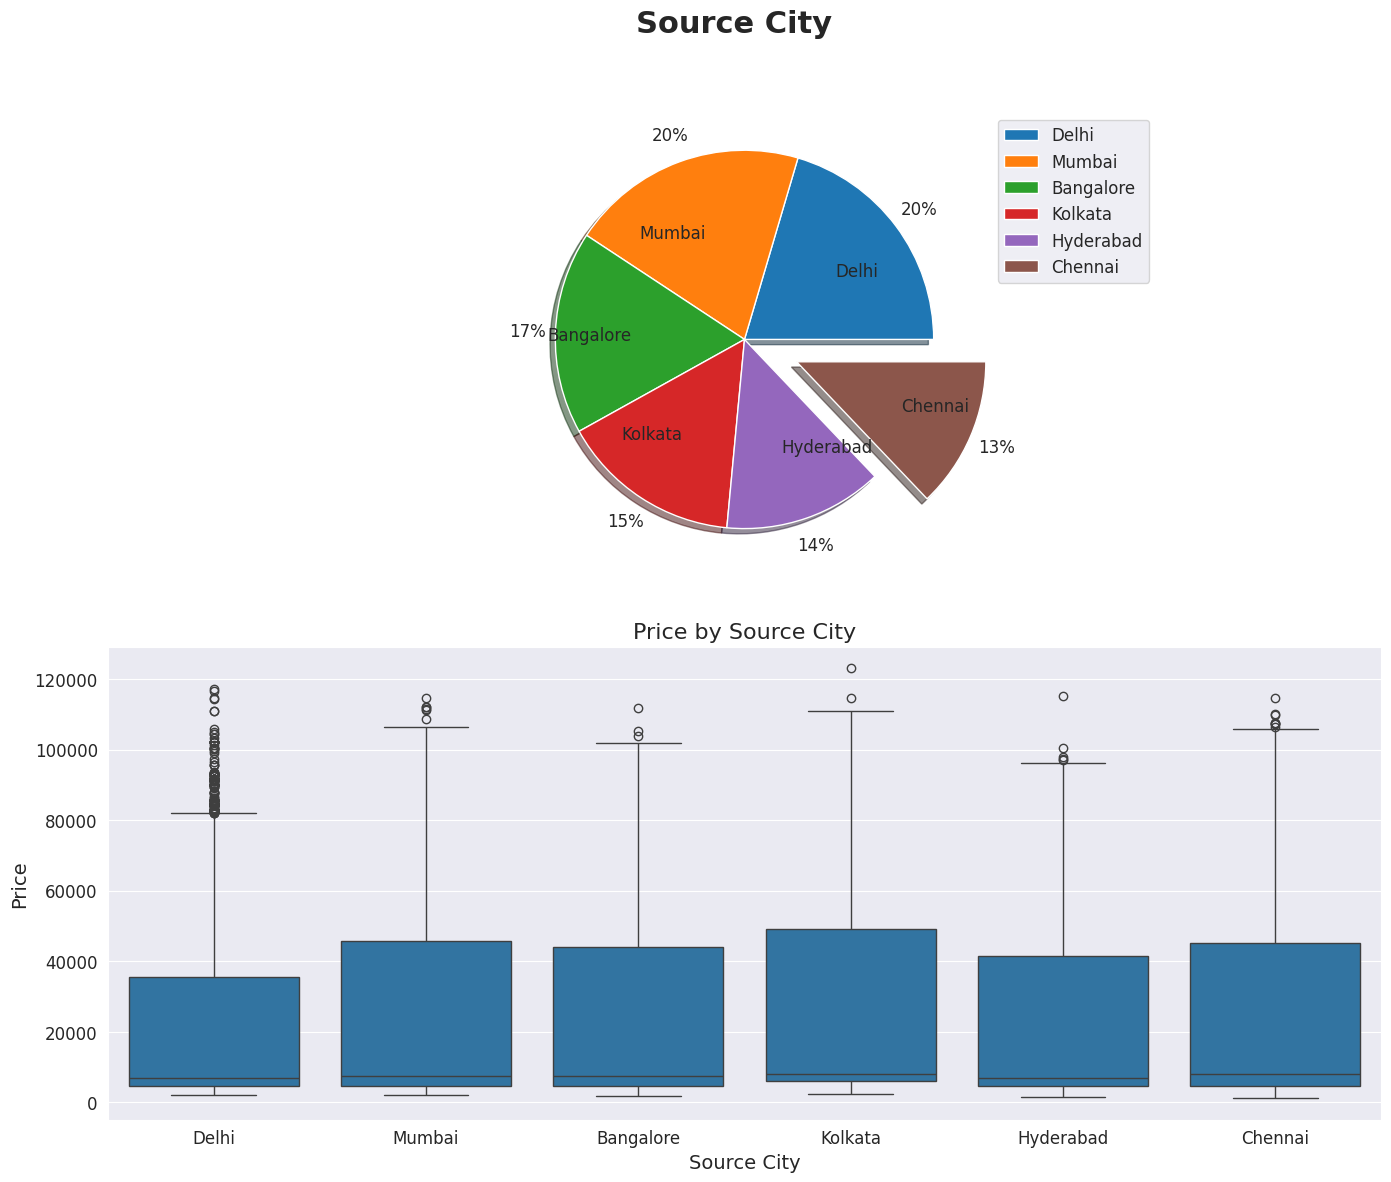

In [54]:

fig, ax = plt.subplots(2, 1, figsize=(14, 12))
fig.suptitle('Source City', fontsize=22, fontweight='bold')


plt.tight_layout(pad=3.0)


labels = data.source_city.value_counts().index.tolist()
explode = (0, 0, 0, 0, 0, 0.3)
ax[0].pie(
    data.source_city.value_counts(), autopct='%.f%%', labels=labels, shadow=True,
    pctdistance=1.15, labeldistance=0.6, explode=explode, textprops={'fontsize': 12}
)
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=1, fontsize=12)
ax[0].set_aspect('equal')

sns.boxplot(x='source_city', y='price', data=data, ax=ax[1])
ax[1].set_title('Price by Source City', fontsize=16)
ax[1].set_xlabel('Source City', fontsize=14)
ax[1].set_ylabel('Price', fontsize=14)
ax[1].tick_params(axis='x', labelsize=12)
ax[1].tick_params(axis='y', labelsize=12)

plt.show()



Almost number of all flights source is equal

departure_time

In [55]:
data.departure_time.value_counts()

,count
departure_time,
Morning,71146
Early_Morning,66790
Evening,65102
Night,48015
Afternoon,47794
Late_Night,1306


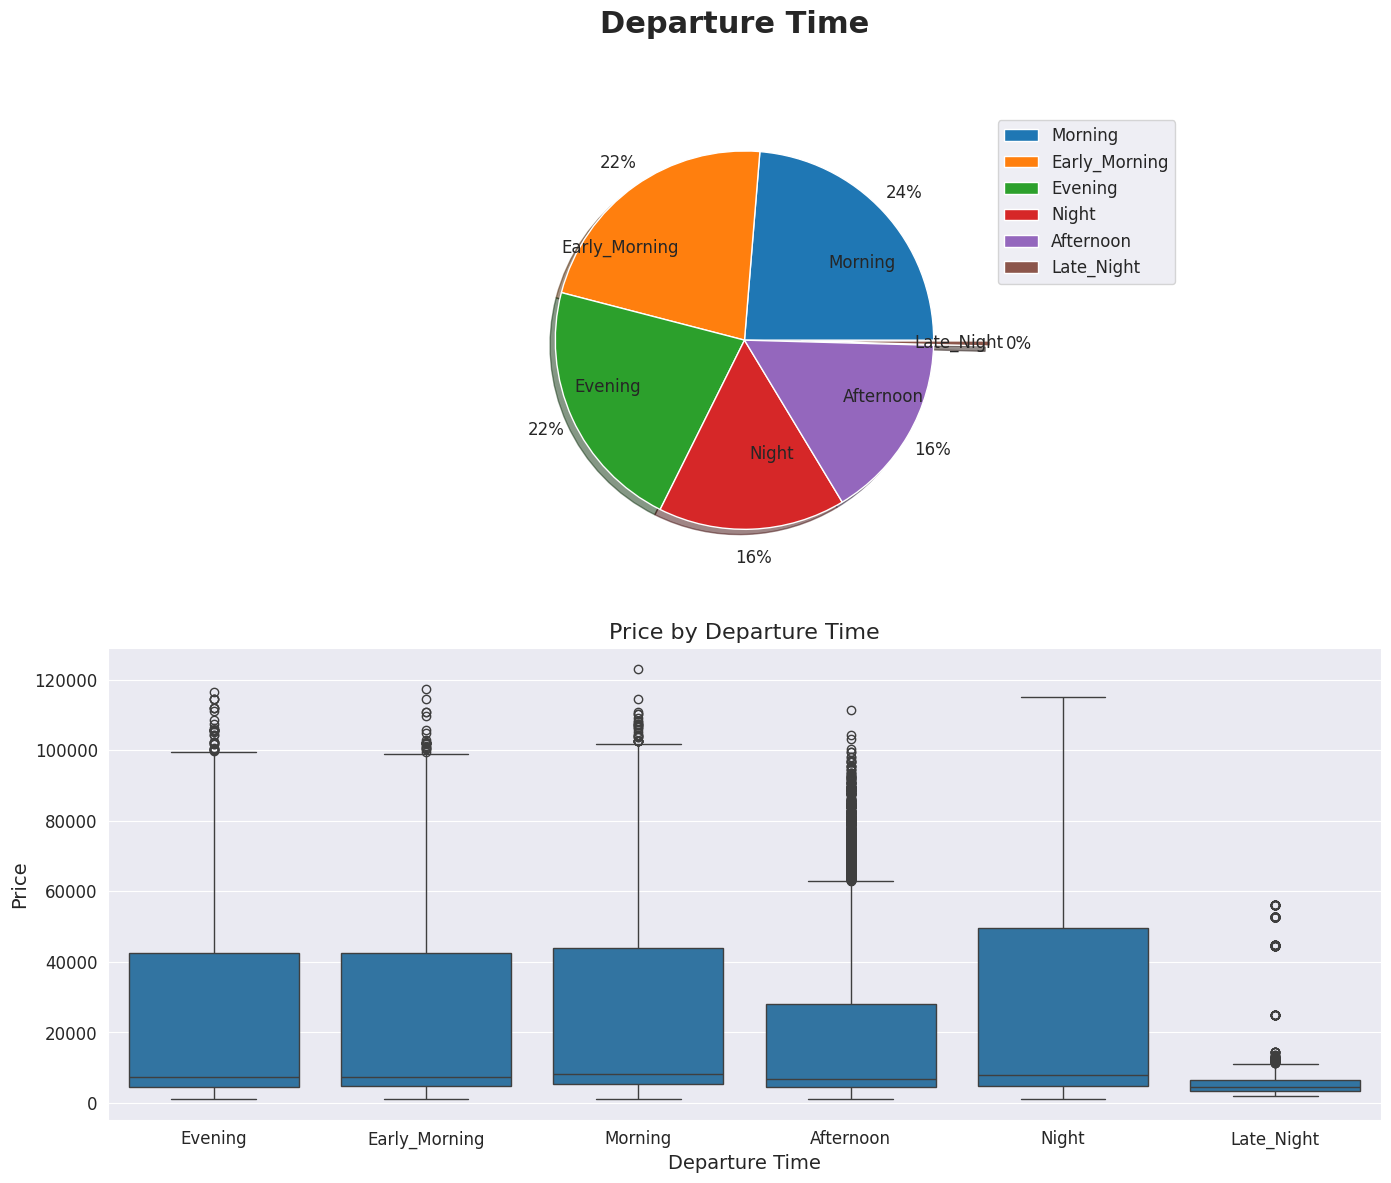

In [56]:


fig, ax = plt.subplots(2, 1, figsize=(14, 12))

fig.suptitle('Departure Time', fontsize=22, fontweight='bold')

plt.tight_layout(pad=3.0)

labels = data.departure_time.value_counts().index.tolist()
explode = (0, 0, 0, 0, 0, 0.3)
ax[0].pie(
    data.departure_time.value_counts(), autopct='%.f%%', labels=labels, shadow=True,
    pctdistance=1.15, labeldistance=0.6, explode=explode, textprops={'fontsize': 12}
)
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=1, fontsize=12)
ax[0].set_aspect('equal')


sns.boxplot(x='departure_time', y='price', data=data, ax=ax[1])
ax[1].set_title('Price by Departure Time', fontsize=16)
ax[1].set_xlabel('Departure Time', fontsize=14)
ax[1].set_ylabel('Price', fontsize=14)
ax[1].tick_params(axis='x', labelsize=12)
ax[1].tick_params(axis='y', labelsize=12)

plt.show()


Except at the end of Late_Night, the frequency of the rest of the departure_time is almost equal

Stops

In [57]:
data.stops.value_counts()

,count
stops,
one,250863
zero,36004
two_or_more,13286


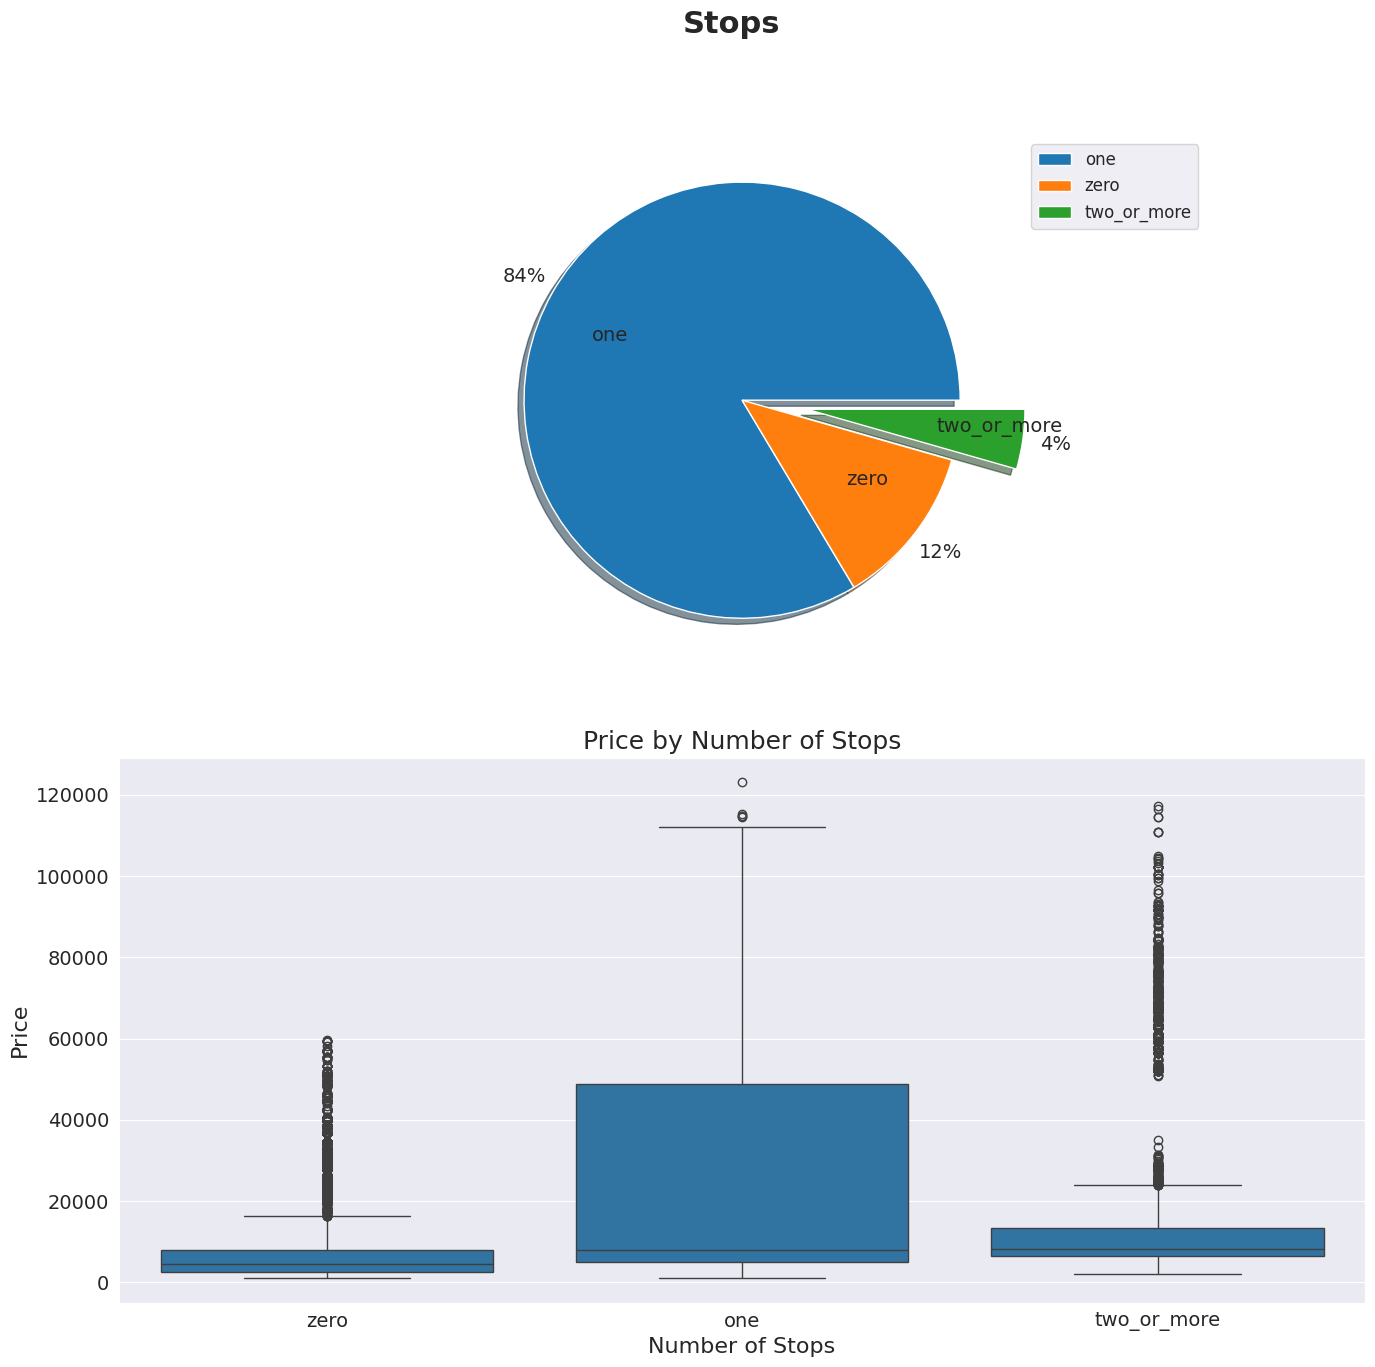

In [58]:

fig, ax = plt.subplots(2, 1, figsize=(14, 14))


fig.suptitle('Stops', fontsize=22, fontweight='bold')

plt.tight_layout(pad=4.0)

labels = data.stops.value_counts().index.tolist()
explode = (0, 0, 0.3)

ax[0].pie(
    data.stops.value_counts(), autopct='%.f%%', labels=labels, shadow=True,
    pctdistance=1.15, labeldistance=0.6, explode=explode, textprops={'fontsize': 14}
)
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=1, fontsize=12)
ax[0].set_aspect('equal')


sns.boxplot(x='stops', y='price', data=data, ax=ax[1])
ax[1].set_title('Price by Number of Stops', fontsize=18)
ax[1].set_xlabel('Number of Stops', fontsize=16)
ax[1].set_ylabel('Price', fontsize=16)
ax[1].tick_params(axis='x', labelsize=14)
ax[1].tick_params(axis='y', labelsize=14)

plt.show()






*  Most of the flights have 1 stop (about 84% , 250863 flights).

*  Just 4% of flights have 2 or more than 2 stops during their flights.


*   About 12% of flights have not any stop.(13286 flights)






arrival_time

In [59]:
data.arrival_time.value_counts()

,count
arrival_time,
Night,91538
Evening,78323
Morning,62735
Afternoon,38139
Early_Morning,15417
Late_Night,14001


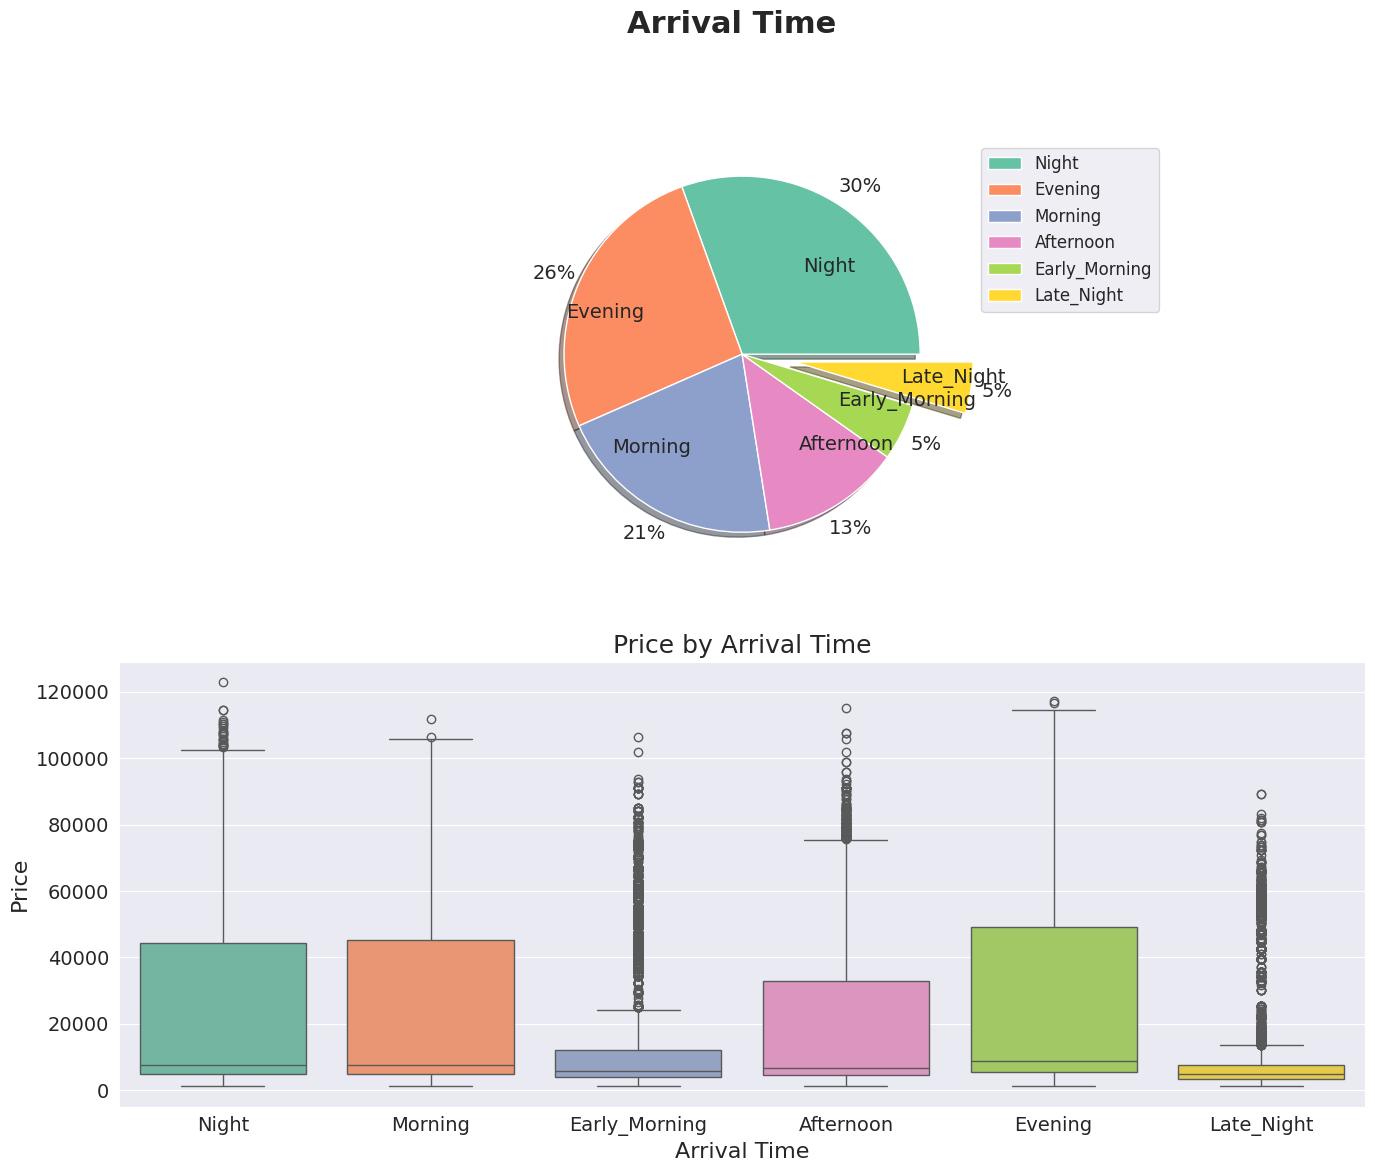

In [60]:

colors = sns.color_palette("Set2", len(data['arrival_time'].unique()))

fig, ax = plt.subplots(2, 1, figsize=(14, 12))

fig.suptitle('Arrival Time', fontsize=22, fontweight='bold')

plt.tight_layout(pad=4.0)

labels = data.arrival_time.value_counts().index.tolist()
explode = (0, 0, 0, 0, 0, 0.3)

ax[0].pie(
    data.arrival_time.value_counts(), autopct='%.f%%', labels=labels, shadow=True,
    pctdistance=1.15, labeldistance=0.6, explode=explode, colors=colors, textprops={'fontsize': 14}
)
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=1, fontsize=12)
ax[0].set_aspect('equal')

sns.boxplot(x='arrival_time', y='price', data=data, ax=ax[1], palette=colors)
ax[1].set_title('Price by Arrival Time', fontsize=18)
ax[1].set_xlabel('Arrival Time', fontsize=16)
ax[1].set_ylabel('Price', fontsize=16)
ax[1].tick_params(axis='x', labelsize=14)
ax[1].tick_params(axis='y', labelsize=14)

plt.show()




destination_city

In [61]:
data.destination_city.value_counts()

,count
destination_city,
Mumbai,59097
Delhi,57360
Bangalore,51068
Kolkata,49534
Hyderabad,42726
Chennai,40368


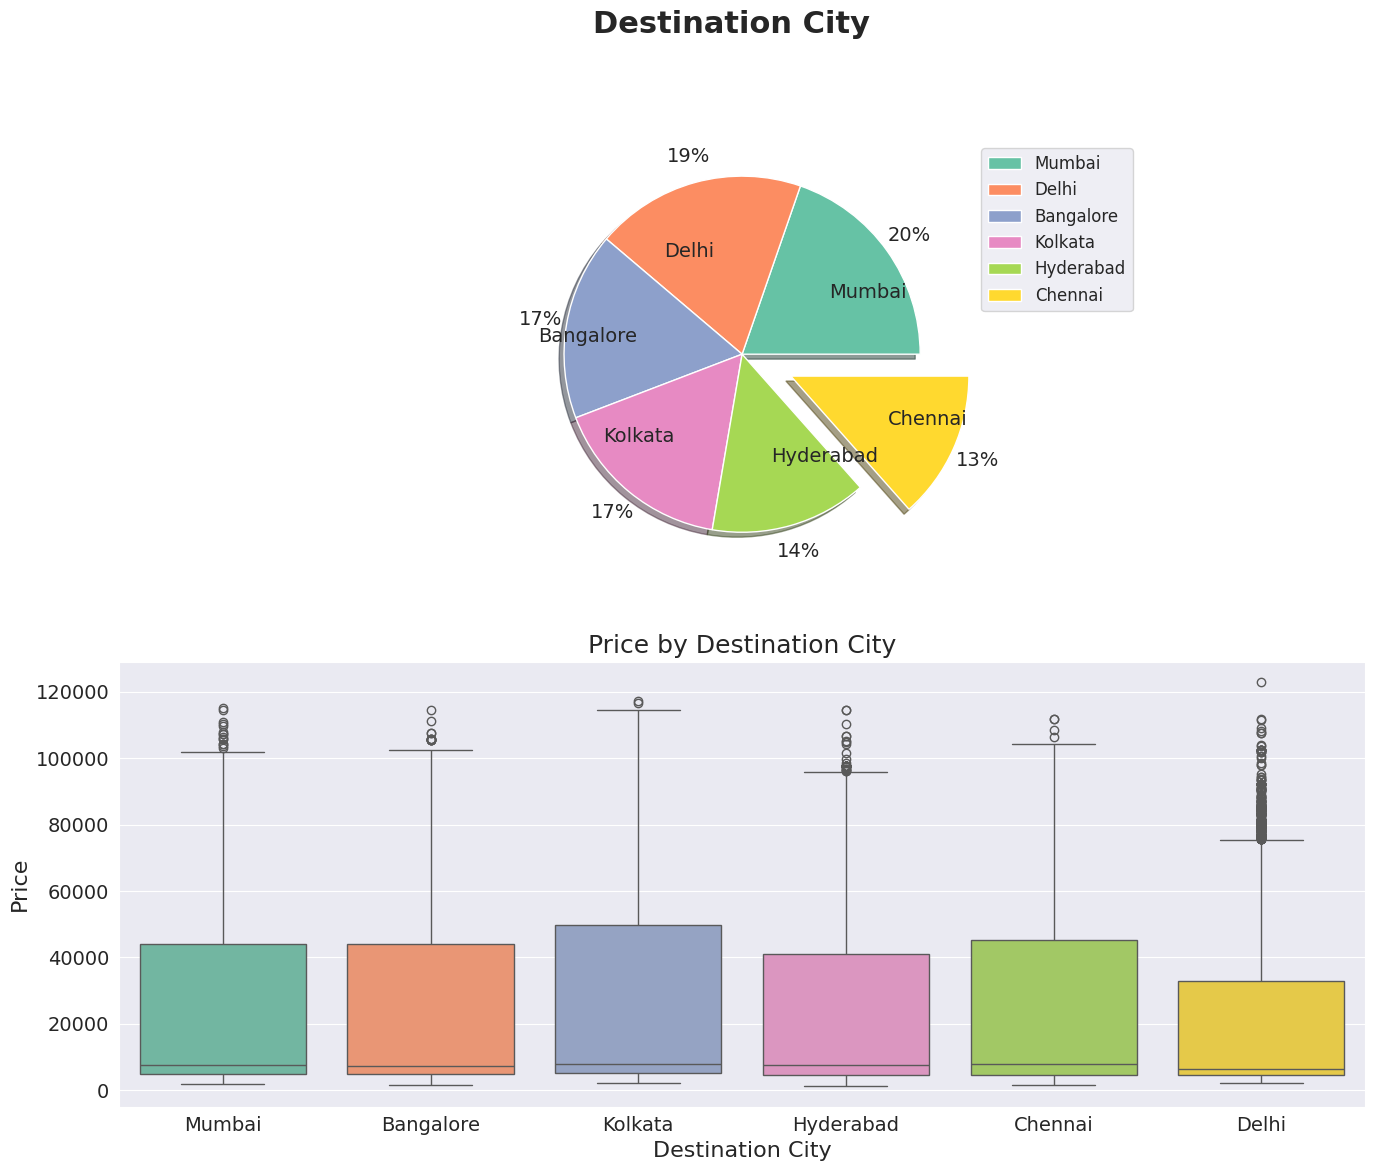

In [62]:

unique_destinations = data['destination_city'].nunique()
colors = sns.color_palette("Set2", unique_destinations)

fig, ax = plt.subplots(2, 1, figsize=(14, 12))


fig.suptitle('Destination City', fontsize=22, fontweight='bold')

plt.tight_layout(pad=4.0)

labels = data.destination_city.value_counts().index.tolist()
explode = (0, 0, 0, 0, 0, 0.3)

ax[0].pie(
    data.destination_city.value_counts(), autopct='%.f%%', labels=labels, shadow=True,
    pctdistance=1.15, labeldistance=0.6, explode=explode, colors=colors, textprops={'fontsize': 14}
)
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=1, fontsize=12)
ax[0].set_aspect('equal')

sns.boxplot(x='destination_city', y='price', data=data, ax=ax[1], palette=colors)
ax[1].set_title('Price by Destination City', fontsize=18)
ax[1].set_xlabel('Destination City', fontsize=16)
ax[1].set_ylabel('Price', fontsize=16)
ax[1].tick_params(axis='x', labelsize=14)
ax[1].tick_params(axis='y', labelsize=14)

plt.show()


flight_class

In [63]:
data.flight_class.value_counts()

,count
flight_class,
Economy,206666
Business,93487


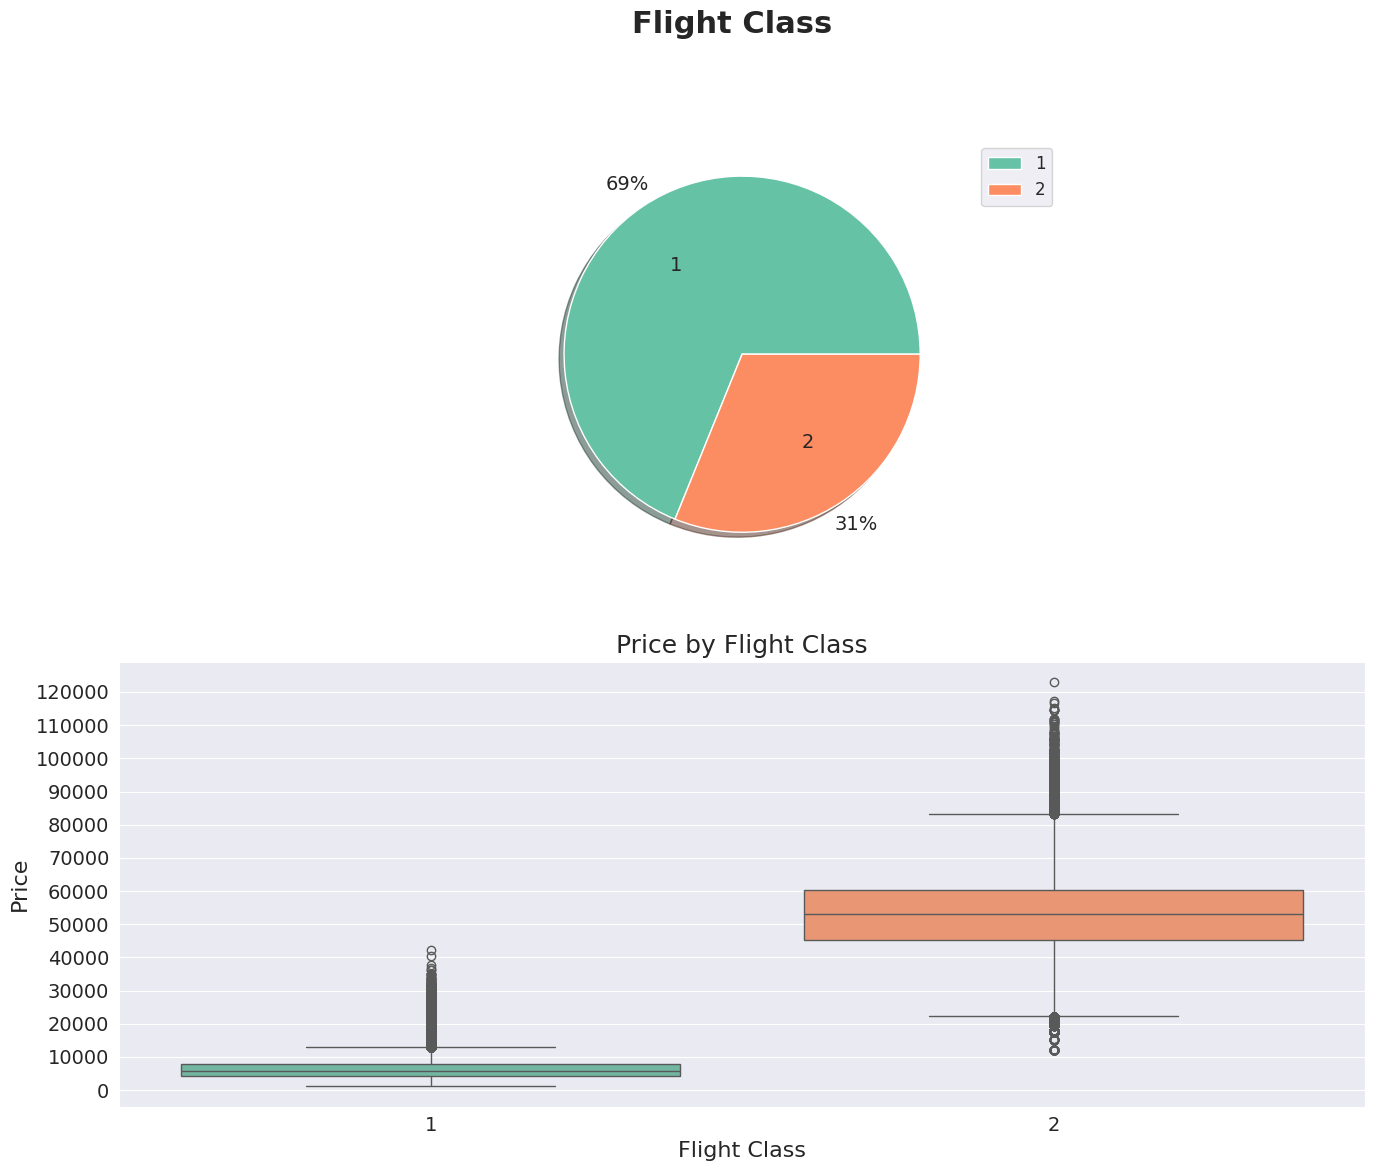

In [98]:

colors = sns.color_palette("Set2", len(data['flight_class'].unique()))

fig, ax = plt.subplots(2, 1, figsize=(14, 12))
fig.suptitle('Flight Class', fontsize=22, fontweight='bold')
plt.tight_layout(pad=4.0)

labels = data.flight_class.value_counts().index.tolist()
ax[0].pie(data.flight_class.value_counts(), autopct='%.f%%', labels=labels, shadow=True,
          pctdistance=1.15, labeldistance=0.6, colors=colors, textprops={'fontsize': 14})
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=1, fontsize=12)
ax[0].set_aspect('equal')

sns.boxplot(x='flight_class', y='price', data=data, ax=ax[1], palette=colors).set_yticks(np.arange(0, 130000, 10000))
ax[1].set_title('Price by Flight Class', fontsize=18)
ax[1].set_xlabel('Flight Class', fontsize=16)
ax[1].set_ylabel('Price', fontsize=16)
ax[1].tick_params(axis='x', labelsize=14)
ax[1].tick_params(axis='y', labelsize=14)

plt.show()




*   Abviously Business classes are more expesive than Economie .
*  
Most of flights are Economy (about 69%).


duration

In [65]:
len(data.duration.value_counts())

476

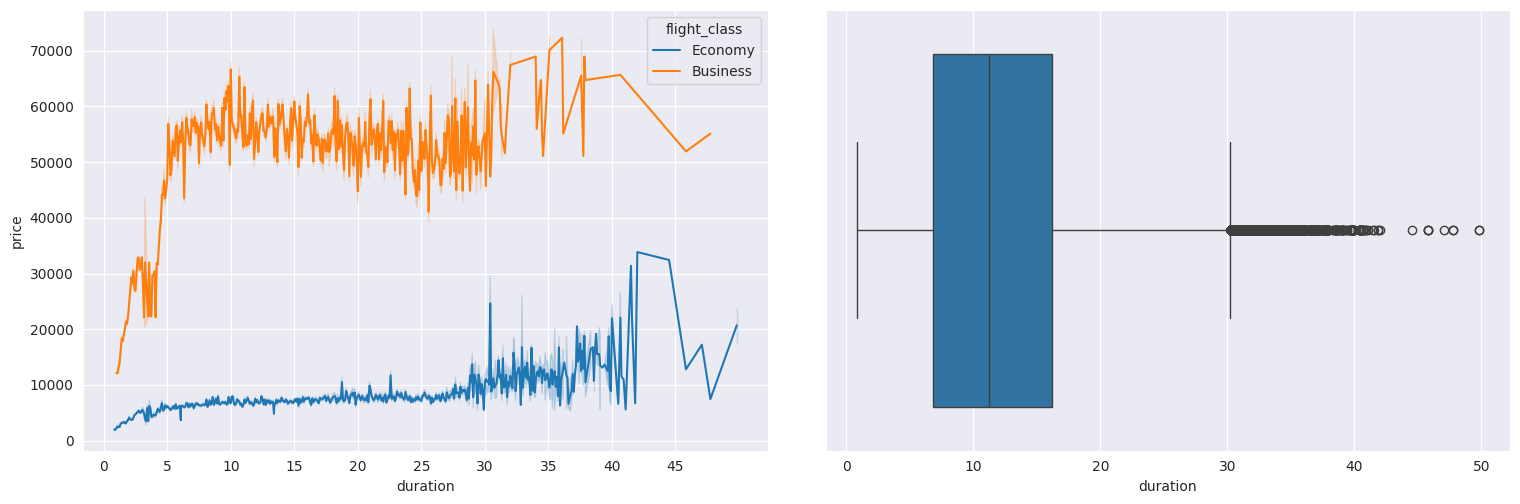

In [66]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.tight_layout()

sns.lineplot(x='duration', y='price', data=data, ax=ax[0], hue='flight_class').set_xticks(np.arange(0, 50, 5))

sns.boxplot(data=data, x='duration', ax=ax[1])
plt.show()



*  In Business class, from 1 to 5 hours, price growth sharply.
* In Business class for durations more than 5, Price in a channel between 45000 to 60000.

*  In Economy class growth of price have a linear growth and for duration=47 have a sharp raise in pricess.






days_left

In [67]:
len(data.days_left.value_counts())

49

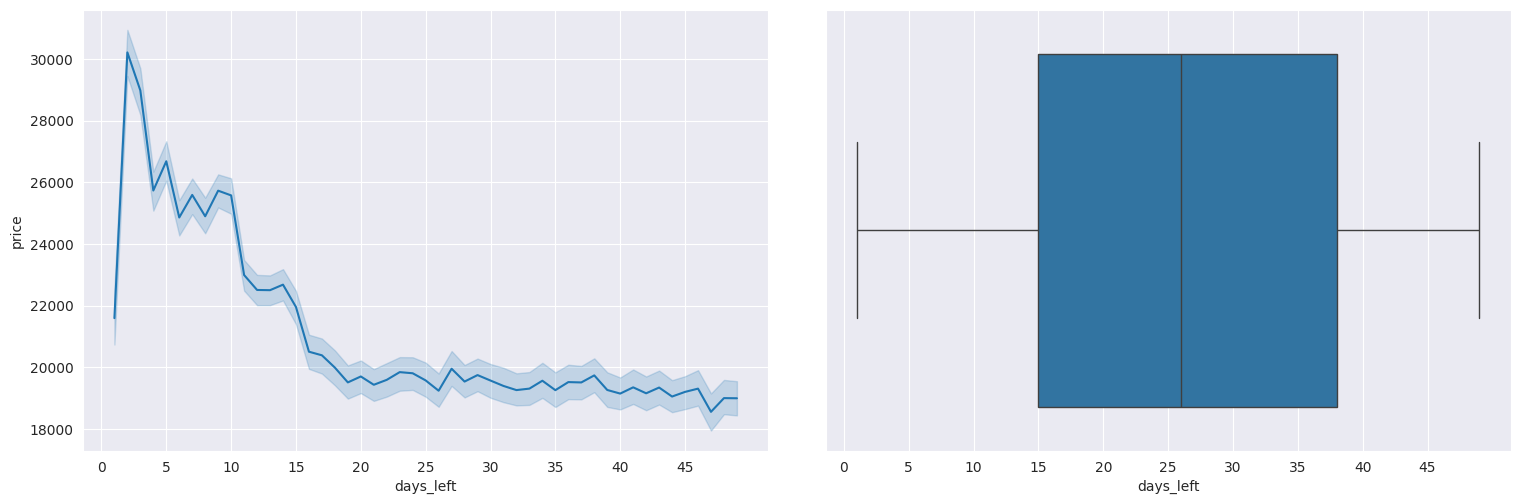

In [68]:

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.tight_layout()

sns.lineplot(x='days_left', y='price', data=data, ax=ax[0]).set_xticks(np.arange(0, 50, 5))

sns.boxplot(data=data, x='days_left', ax=ax[1]).set_xticks(np.arange(0, 50, 5))
plt.show()



*  The earlier you book your ticket, the less you will pay(for values greater than 2)



Price

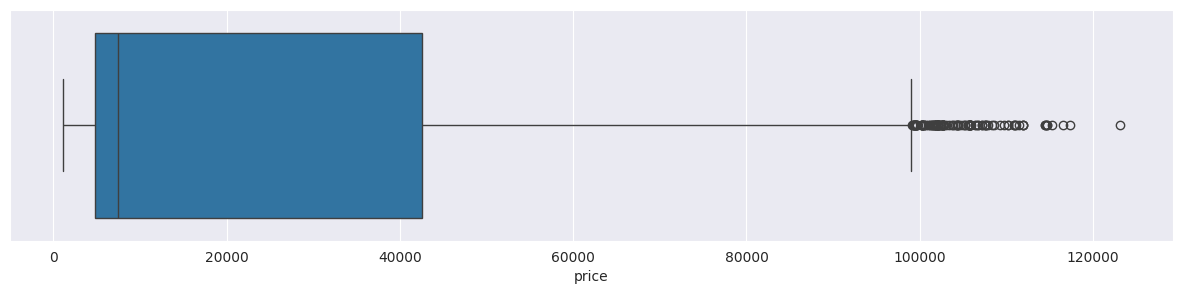

In [69]:
plt.figure(figsize=(15, 3))
sns.boxplot(data=data, x='price')
plt.show()

Replace string values with integer

In [70]:
data.airline = data.airline.replace(
    {
        'Vistara' : 1,
        'Air_India' : 2,
        'Indigo' : 3,
        'GO_FIRST' : 4,
        'AirAsia': 5,
        'SpiceJet' : 6
    }
)

In [71]:
data.source_city = data.source_city.replace(
    {
        'Delhi' : 1,
        'Mumbai' : 2,
        'Bangalore' : 3,
        'Kolkata' : 4,
        'Hyderabad'  : 5,
        'Chennai' : 6
    }
)

In [72]:
data.departure_time = data.departure_time.replace(
    {
        'Morning' : 1,
        'Early_Morning' : 2,
        'Evening' : 3,
        'Night' : 4,
        'Afternoon' : 5,
        'Late_Night' : 6
    }
)

In [73]:
data.stops = data.stops.replace(
    {
        'one' : 1,
        'zero' : 2,
        'two_or_more' : 3
    }
)

In [74]:
data.arrival_time = data.arrival_time.replace(
    {
        'Night' : 1,
        'Evening' : 2,
        'Morning' : 3,
        'Afternoon' : 4,
        'Early_Morning' : 5,
        'Late_Night' : 6
    }
)

In [75]:
data.destination_city = data.destination_city.replace(
    {
        'Mumbai' : 1,
        'Delhi' : 2,
        'Bangalore' : 3,
        'Kolkata' : 4,
        'Hyderabad' : 5,
        'Chennai' : 6
    }
)

In [76]:
data.flight_class = data.flight_class.replace(
    {
        'Economy' : 1,
        'Business' :2
    }
)

In [77]:
data.describe()

,airline,source_city,departure_time,stops,arrival_time,destination_city,flight_class,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000
mean,2.153072,3.201487,2.794901,1.208480,2.498846,3.268316,1.311464,12.221021,26.004751,20889.660523
std,1.348357,1.684757,1.401659,0.503533,1.407841,1.688644,0.463093,7.191997,13.561004,22697.767366
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,1.000000,1105.000000
25%,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,6.830000,15.000000,4783.000000
50%,2.000000,3.000000,3.000000,1.000000,2.000000,3.000000,1.000000,11.250000,26.000000,7425.000000
75%,3.000000,5.000000,4.000000,1.000000,3.000000,5.000000,2.000000,16.170000,38.000000,42521.000000
max,6.000000,6.000000,6.000000,3.000000,6.000000,6.000000,2.000000,49.830000,49.000000,123071.000000


Correlations

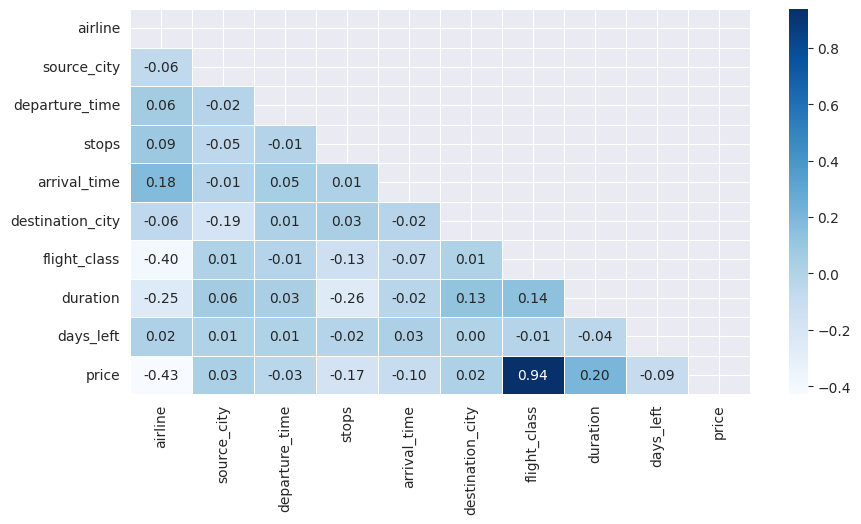

In [78]:

corr = data.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.5, linecolor='white', mask=mask, cmap='Blues')
plt.show()





*  Flight classes is most relevant feature to Price



 Define X ,y

In [79]:
X_temp = data.drop(columns='price')
y = data.price

Normalization

In [80]:
scaler = MinMaxScaler().fit_transform(X_temp)
X = pd.DataFrame(scaler, columns=X_temp.columns)

In [81]:
X.describe().T[['min', 'mean', 'std', '50%', 'max']].style.background_gradient(axis=1)

,min,mean,std,50%,max
airline,0.000000,0.230614,0.269671,0.200000,1.000000
source_city,0.000000,0.440297,0.336951,0.400000,1.000000
departure_time,0.000000,0.358980,0.280332,0.400000,1.000000
stops,0.000000,0.104240,0.251766,0.000000,1.000000
arrival_time,0.000000,0.299769,0.281568,0.200000,1.000000
destination_city,0.000000,0.453663,0.337729,0.400000,1.000000
flight_class,0.000000,0.311464,0.463093,0.000000,1.000000
duration,0.000000,0.232470,0.146775,0.212653,1.000000
days_left,0.000000,0.520932,0.282521,0.520833,1.000000


In [82]:
main_X = X.copy()

Modling


Linear Regression

Best test_size : 0.15
Best R2Score : 0.8966402677524069
Best Mean Squared Error : 52819242.41679669


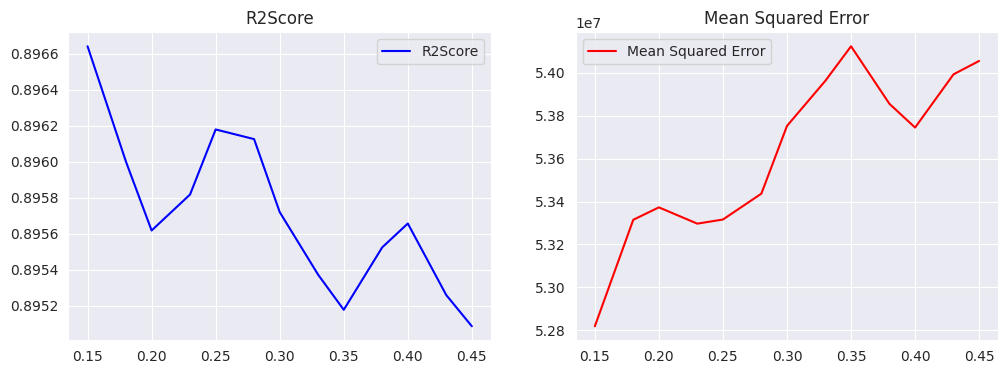

In [87]:
test_list = []
mse_list = []
r2score_list = []
best_r2=0
best_mse=0
best_test=0

for tester in range(6, 19) :
    tester = round(0.025 * tester, 2)
    test_list.append(tester)
    #
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tester, random_state=0)
    #
    lr = LinearRegression().fit(X, y)
    y_pred_lr = lr.predict(X_test)
    r2score = metrics.r2_score(y_test, y_pred_lr)
    r2score_list.append(r2score)
    mse = metrics.mean_squared_error(y_test, y_pred_lr)
    mse_list.append(mse)
    #
    if r2score>best_r2 :
        best_r2 = r2score
        best_mse = mse
        best_test = tester
print(('Best test_size : {}'.format(best_test) ))
print(('Best R2Score : {}'.format(best_r2) ))
print(('Best Mean Squared Error : {}'.format(best_mse) ))

# Plot
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(test_list, r2score_list, c='blue', label='R2Score')
ax[0].set_title("R2Score")
ax[0].legend()

ax[1].plot(test_list, mse_list, c='red', label='Mean Squared Error')
ax[1].set_title("Mean Squared Error")
ax[1].legend()
plt.show()

Acc = 89.66%

use most relevent feature to target : flight_class to increase accuracy

In [89]:
for power in range(2, 7) :
    new_col_name = 'flight_class^' + str(power)
    X[new_col_name] = pow(X.flight_class, power)
    #
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=best_test, random_state=0)
    #
    lr = LinearRegression().fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    r2score = metrics.r2_score(y_test, y_pred)
    diff = r2score-best_r2
    if r2score > best_r2 :
        best_r2 = r2score
        print(('{} improve r2score by {}'.format(new_col_name, diff) ))
    else :
        X.drop(columns=[new_col_name], inplace=True)
        print(('{} Not improve r2score'.format(new_col_name) ))

flight_class^2 Not improve r2score
flight_class^3 Not improve r2score
flight_class^4 Not improve r2score
flight_class^5 Not improve r2score
flight_class^6 Not improve r2score


In [90]:
columns = X.columns
for col in columns :
    new_col_name = 'flight_class*' + col
    X[new_col_name] = X.flight_class * X[col]
    #
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=best_test, random_state=0)
    #
    lr = LinearRegression().fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    r2score = metrics.r2_score(y_test, y_pred)
    diff = r2score-best_r2
    if (r2score > best_r2) and (diff>=0.001) :
        best_r2 = r2score
        print(('{} improve r2score by {}'.format(new_col_name, diff)))
    else :
        X.drop(columns=[new_col_name], inplace=True)
        print(('{} Not improve r2score'.format(new_col_name)))

flight_class*airline improve r2score by 0.008893798233847061
flight_class*source_city Not improve r2score
flight_class*departure_time Not improve r2score
flight_class*stops improve r2score by 0.01036429542690509
flight_class*arrival_time Not improve r2score
flight_class*destination_city Not improve r2score
flight_class*flight_class Not improve r2score
flight_class*duration Not improve r2score
flight_class*days_left Not improve r2score


In [94]:
lr_r2 = best_r2
print(('Liear Legresion R2Score = {}'.format(round(lr_r2, 3))))

Liear Legresion R2Score = 0.916


DecisionTreeRegressor

In [93]:
parameters = {
    'splitter' : ['best', 'random'],
    'max_features' : [None, 8, 7, 6, 5],
}

X_train, X_test, y_train, y_test = train_test_split(main_X, y, test_size=tester, random_state=0)


tree = DecisionTreeRegressor()
tree_cv = GridSearchCV(estimator=tree, param_grid=parameters, cv=20).fit(X_train, y_train)

print(('Tuned Hyper Parameters :\n{}'.format(tree_cv.best_params_)))

Tuned Hyper Parameters :
{'max_features': 8, 'splitter': 'best'}


In [95]:
tree = DecisionTreeRegressor(**tree_cv.best_params_).fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
tree_r2 = metrics.r2_score(y_test, y_pred_tree)
print(('DecisionTreeRegressor R2Score = {}'.format(round(tree_r2, 3))))

DecisionTreeRegressor R2Score = 0.974


 RandomForestRegressor

In [96]:
X_train, X_test, y_train, y_test = train_test_split(main_X, y, test_size=tester, random_state=0)

rf = RandomForestRegressor(n_estimators=500, max_features=8, n_jobs=-1).fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_r2 = metrics.r2_score(y_test, y_pred_rf)
print(('RandomForestRegressor R2Score = {}'.format(round(rf_r2, 3))))

RandomForestRegressor R2Score = 0.985


 Result

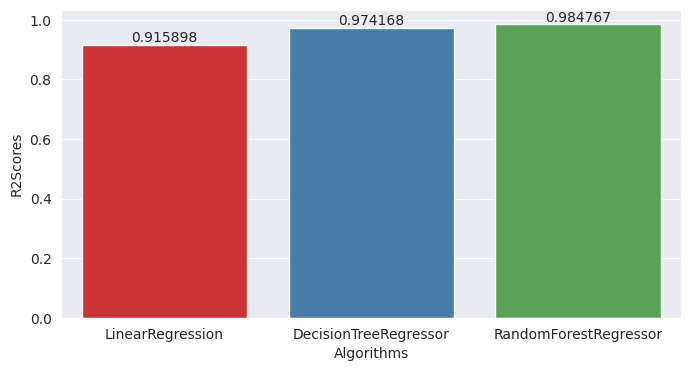

In [97]:
result = pd.DataFrame({
    'Algorithms' : ['LinearRegression', 'DecisionTreeRegressor', 'RandomForestRegressor'],
    'R2Scores' : [lr_r2, tree_r2, rf_r2]
})
plt.figure(figsize=(8, 4))
ax = sns.barplot(x='Algorithms', y='R2Scores', data=result, palette='Set1')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

 RandomForestRegressor have maximum R2Score and choose as best model.